# Data Loading & Pre-Processing

In [1]:
!wget http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
!tar -xzf UCSD_Anomaly_Dataset.tar.gz
!rm -rf Train
!rm -rf Test
!mkdir Train
!mkdir Test
!mv UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train .
!mv UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test .
!rm -rf UCSD_Anomaly_Dataset.v1p2

--2023-05-03 20:35:48--  http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
Resolving www.svcl.ucsd.edu (www.svcl.ucsd.edu)... 169.228.63.130
Connecting to www.svcl.ucsd.edu (www.svcl.ucsd.edu)|169.228.63.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740306953 (706M) [application/x-gzip]
Saving to: ‘UCSD_Anomaly_Dataset.tar.gz’

UCSD_Anomaly_Datase 100%[===================>] 706.01M  42.0MB/s    in 21s     

2023-05-03 20:36:09 (33.9 MB/s) - ‘UCSD_Anomaly_Dataset.tar.gz’ saved [740306953/740306953]



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# %cd drive/MyDrive/DL\ Proj/

Mounted at /content/drive


In [3]:
# !gdown --folder https://drive.google.com/drive/folders/1-upYJCE7Ckv8fyX5usyxAe5kjk0YxX03
# %cd ped2/
# !mv * ../
# %cd ..
# !rm -r ped2

In [4]:
# import numpy as np
# data_train = np.load('/content/ped2_bboxes_train.npy',allow_pickle = True)
# data_train

In [5]:
# data_train.shape

In [6]:
# data_train[0].shape

In [7]:
# data_train[1].shape

In [8]:
# data_train[48].shape

In [9]:
# import torch
# import torchvision
# import cv2
# from PIL import Image
# import numpy as np
# import torchvision.models as models
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
# import argparse
# from tqdm import tqdm
# !git clone https://github.com/ultralytics/yolov5.git

In [10]:
# # # Load the original image
# img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# for box in boxes:
#     x1, y1, x2, y2 = box[:4]  # Unpack the first four values only
#     cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

# # Display the image
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [11]:
# # # Load the original image
# img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# for box in data_train[]:
#     x1, y1, x2, y2 = box[:4]  # Unpack the first four values only
#     cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
#     # cv2.putText(img, model.names[int(label)], (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# # Display the image
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#### Andrew Code

In [12]:
from PIL import Image
import numpy as np
import os

def load_label_dict():
  arr = []
  with open('Test/UCSDped2.m') as f:
    for line in f:
      if 'gt_frame' in line:
        rng = line.split('[')[1][:-3]
        arr.append([int(s) for s in rng.split(':')])
  d = {i: arr[i] for i in range(12)}
  return d

def load_frame(path):
  im = Image.open(path)
  return np.array(im)

def load_video_and_labels(test=False):
  root_dir = 'Test' if test else 'Train'
  d = load_label_dict()
  video_folders = [f for f in os.listdir(root_dir) if root_dir in f and 'gt' not in f]
  video_folders.sort()
  all_data = []
  for index, video_folder in enumerate(video_folders):
    frames = [f for f in os.listdir(root_dir + '/' + video_folder) if 'tif' in f]
    all_frame_matrices = [load_frame(root_dir + '/' + video_folder + '/' + frame) for frame in frames]
    num_frames = len(frames)
    if test:
      min_index, max_index = d[index]
      y_true = np.concatenate((np.zeros(min_index - 1), np.ones(max_index - min_index + 1), np.zeros(num_frames - max_index)))
      all_data.append((np.array(all_frame_matrices), y_true))
    else:
      all_data.append(np.array(all_frame_matrices))
  return all_data
result = load_video_and_labels(test=True)

In [13]:
test_videos = load_video_and_labels(test=True)
train_videos = load_video_and_labels(test=False)

In [14]:
test_videos[0][0].shape, test_videos[0][1].shape, train_videos[0].shape

((180, 240, 360), (180,), (120, 240, 360))

In [15]:
!mkdir videos

In [16]:
import os
import moviepy.video.io.ImageSequenceClip
import cv2, os

def images_to_mp4(path, vid_name):
  image_files = [os.path.join(path,img) for img in os.listdir(path) if img.endswith(".tif")]
  jpeg_files = []
  for f in image_files:
    read = cv2.imread(f)
    outfile = f.split('.')[0] + '.jpg'
    jpeg_files.append(outfile)
    cv2.imwrite(outfile, read ,[int(cv2.IMWRITE_JPEG_QUALITY), 200])
  jpeg_files.sort()
  clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(jpeg_files, fps=10)
  clip.write_videofile(vid_name + '.mp4')

for i in range(12):
  images_to_mp4('Test/Test' + ('00' + str(i + 1) if i + 1 < 10 else '0' + str(i + 1)), 'videos/Test' + str(i + 1))

for i in range(16):
  images_to_mp4('Train/Train' + ('00' + str(i + 1) if i + 1 < 10 else '0' + str(i + 1)), 'videos/Train' + str(i + 1))


Moviepy - Building video videos/Test1.mp4.
Moviepy - Writing video videos/Test1.mp4



Moviepy - Done !
Moviepy - video ready videos/Test1.mp4
Moviepy - Building video videos/Test2.mp4.
Moviepy - Writing video videos/Test2.mp4



Moviepy - Done !
Moviepy - video ready videos/Test2.mp4
Moviepy - Building video videos/Test3.mp4.
Moviepy - Writing video videos/Test3.mp4



Moviepy - Done !
Moviepy - video ready videos/Test3.mp4
Moviepy - Building video videos/Test4.mp4.
Moviepy - Writing video videos/Test4.mp4



Moviepy - Done !
Moviepy - video ready videos/Test4.mp4
Moviepy - Building video videos/Test5.mp4.
Moviepy - Writing video videos/Test5.mp4



Moviepy - Done !
Moviepy - video ready videos/Test5.mp4
Moviepy - Building video videos/Test6.mp4.
Moviepy - Writing video videos/Test6.mp4



Moviepy - Done !
Moviepy - video ready videos/Test6.mp4
Moviepy - Building video videos/Test7.mp4.
Moviepy - Writing video videos/Test7.mp4



Moviepy - Done !
Moviepy - video ready videos/Test7.mp4
Moviepy - Building video videos/Test8.mp4.
Moviepy - Writing video videos/Test8.mp4



Moviepy - Done !
Moviepy - video ready videos/Test8.mp4
Moviepy - Building video videos/Test9.mp4.
Moviepy - Writing video videos/Test9.mp4



Moviepy - Done !
Moviepy - video ready videos/Test9.mp4
Moviepy - Building video videos/Test10.mp4.
Moviepy - Writing video videos/Test10.mp4



Moviepy - Done !
Moviepy - video ready videos/Test10.mp4
Moviepy - Building video videos/Test11.mp4.
Moviepy - Writing video videos/Test11.mp4



Moviepy - Done !
Moviepy - video ready videos/Test11.mp4
Moviepy - Building video videos/Test12.mp4.
Moviepy - Writing video videos/Test12.mp4



Moviepy - Done !
Moviepy - video ready videos/Test12.mp4
Moviepy - Building video videos/Train1.mp4.
Moviepy - Writing video videos/Train1.mp4



Moviepy - Done !
Moviepy - video ready videos/Train1.mp4
Moviepy - Building video videos/Train2.mp4.
Moviepy - Writing video videos/Train2.mp4



Moviepy - Done !
Moviepy - video ready videos/Train2.mp4
Moviepy - Building video videos/Train3.mp4.
Moviepy - Writing video videos/Train3.mp4



Moviepy - Done !
Moviepy - video ready videos/Train3.mp4
Moviepy - Building video videos/Train4.mp4.
Moviepy - Writing video videos/Train4.mp4



Moviepy - Done !
Moviepy - video ready videos/Train4.mp4
Moviepy - Building video videos/Train5.mp4.
Moviepy - Writing video videos/Train5.mp4



Moviepy - Done !
Moviepy - video ready videos/Train5.mp4
Moviepy - Building video videos/Train6.mp4.
Moviepy - Writing video videos/Train6.mp4



Moviepy - Done !
Moviepy - video ready videos/Train6.mp4
Moviepy - Building video videos/Train7.mp4.
Moviepy - Writing video videos/Train7.mp4



Moviepy - Done !
Moviepy - video ready videos/Train7.mp4
Moviepy - Building video videos/Train8.mp4.
Moviepy - Writing video videos/Train8.mp4



Moviepy - Done !
Moviepy - video ready videos/Train8.mp4
Moviepy - Building video videos/Train9.mp4.
Moviepy - Writing video videos/Train9.mp4



Moviepy - Done !
Moviepy - video ready videos/Train9.mp4
Moviepy - Building video videos/Train10.mp4.
Moviepy - Writing video videos/Train10.mp4



Moviepy - Done !
Moviepy - video ready videos/Train10.mp4
Moviepy - Building video videos/Train11.mp4.
Moviepy - Writing video videos/Train11.mp4



Moviepy - Done !
Moviepy - video ready videos/Train11.mp4
Moviepy - Building video videos/Train12.mp4.
Moviepy - Writing video videos/Train12.mp4



Moviepy - Done !
Moviepy - video ready videos/Train12.mp4
Moviepy - Building video videos/Train13.mp4.
Moviepy - Writing video videos/Train13.mp4



Moviepy - Done !
Moviepy - video ready videos/Train13.mp4
Moviepy - Building video videos/Train14.mp4.
Moviepy - Writing video videos/Train14.mp4



Moviepy - Done !
Moviepy - video ready videos/Train14.mp4
Moviepy - Building video videos/Train15.mp4.
Moviepy - Writing video videos/Train15.mp4



Moviepy - Done !
Moviepy - video ready videos/Train15.mp4
Moviepy - Building video videos/Train16.mp4.
Moviepy - Writing video videos/Train16.mp4



Moviepy - Done !
Moviepy - video ready videos/Train16.mp4


# Loading Bounding Boxes

In [17]:
!pip install ultralytics &> /dev/null

In [18]:
from ultralytics import YOLO
# import torch

bounding_box_model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.9MB/s]


In [19]:
import numpy as np
import os
from PIL import Image

# Threshold

In [20]:
thresh = 0.5

In [21]:
is_test = False
xywh = []
conf_arr = []
for ij in range(16):
  video_index = ij + 1 
  result = list(bounding_box_model('videos/' + ('Test' if is_test else 'Train') + str(video_index) + '.mp4', verbose=False, stream=True))
  num_frames = len(result)
  for i in range(num_frames):
    xywh.append(result[i].boxes.xyxy.numpy()[np.argwhere(result[i].boxes.conf.numpy() >= thresh)].squeeze())
    conf_arr.append(result[i].boxes.conf.numpy())
  print(video_index, np.array(xywh).shape)
xywh = np.array(xywh)
conf_arr = np.array(conf_arr)

<ipython-input-21-57333221a509>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(video_index, np.array(xywh).shape)


1 (120,)
2 (270,)
3 (420,)
4 (600,)
5 (780,)
6 (930,)
7 (1080,)
8 (1200,)
9 (1380,)
10 (1560,)
11 (1740,)
12 (1920,)
13 (2100,)
14 (2250,)
15 (2400,)
16 (2550,)


<ipython-input-21-57333221a509>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xywh = np.array(xywh)
<ipython-input-21-57333221a509>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  conf_arr = np.array(conf_arr)


In [22]:
print(np.array(xywh).shape)
print(np.array(xywh)[0].shape)

(2550,)
(12, 4)


In [23]:
# for i in range(len(xywh)):
#   x = xywh[i].shape[0]
#   y = data_train[i].shape[0]
#   if x-y > 2:
#     print(i, x, y, x-y ,conf_arr[i])

In [24]:
# from google.colab import drive
# drive.mount('/content/gdrive')
%cd /content/drive/MyDrive/DL Proj

/content/drive/.shortcut-targets-by-id/1YVeuUAzHoGzUPlo7fMNjd5OVIsSLwMFE/DL Proj


In [25]:
('%.2f' % thresh)[-2:]

'50'

In [26]:
print('/content/drive/MyDrive/DL Proj/Train_bounding_boxes_'+ ('%.2f' % thresh)[-2:] +'.npy')
np.save('/content/drive/MyDrive/DL Proj/Train_bounding_boxes_'+ ('%.2f' % thresh)[-2:] +'.npy', xywh)
%cd ../../../..

/content/drive/MyDrive/DL Proj/Train_bounding_boxes_50.npy
/content


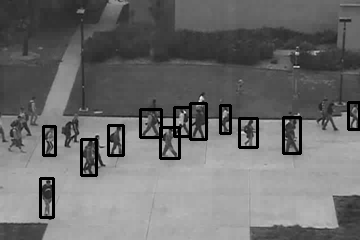

In [27]:
from google.colab.patches import cv2_imshow
path ='Train/Train001/001.tif'
boxes = xywh[0]
labels = np.arange(len(boxes))

# Load the original image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for box, label in zip(boxes, labels):
    x1, y1, x2, y2 = box[:4]  # Unpack the first four values only
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
    # cv2.putText(img, str(label), (int(x1), int(y1)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
is_test = True
xywh_test = []
for ij in range(12):
  video_index = ij + 1 
  result = list(bounding_box_model('videos/' + ('Test' if is_test else 'Train') + str(video_index) + '.mp4', verbose=False, stream=True))
  num_frames = len(result)
  for i in range(num_frames):
    xywh_test.append(result[i].boxes.xyxy.numpy()[np.argwhere(result[i].boxes.conf.numpy() >= thresh)].squeeze())
  print(video_index, np.array(xywh_test).shape)
xywh_test = np.array(xywh_test)
print(np.array(xywh_test).shape)
print(np.array(xywh_test)[0].shape)

<ipython-input-28-35a228ff0a50>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(video_index, np.array(xywh_test).shape)


1 (180,)
2 (360,)
3 (510,)
4 (690,)
5 (840,)
6 (1020,)
7 (1200,)
8 (1380,)
9 (1500,)
10 (1650,)
11 (1830,)
12 (2010,)
(2010,)
(10, 4)


<ipython-input-28-35a228ff0a50>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xywh_test = np.array(xywh_test)


In [29]:
%cd /content/drive/MyDrive/DL Proj
print('/content/drive/MyDrive/DL Proj/Test_bounding_boxes_'+ ('%.2f' % thresh)[-2:] +'.npy')
np.save('/content/drive/MyDrive/DL Proj/Test_bounding_boxes_'+ ('%.2f' % thresh)[-2:] +'.npy', xywh_test)

/content/drive/.shortcut-targets-by-id/1YVeuUAzHoGzUPlo7fMNjd5OVIsSLwMFE/DL Proj
/content/drive/MyDrive/DL Proj/Test_bounding_boxes_50.npy


In [30]:
%cd ../../../..

/content


In [31]:
# import numpy as np
# data_train = np.load('/content/ped2_bboxes_test.npy',allow_pickle = True)
# data_train.shape

In [32]:
# data_train[0].shape

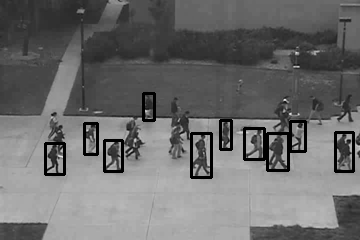

In [33]:
from google.colab.patches import cv2_imshow
path ='Test/Test001/001.tif'
boxes = xywh_test[0]

# Load the original image
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

for box in boxes:
    x1, y1, x2, y2 = box[:4]  # Unpack the first four values only
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)

# Display the image
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()